In [73]:
import pandas
import networkx as nx
import random
import itertools
import matplotlib.pyplot as plt

In [80]:
pwd

'/content'

In [82]:
data=pandas.read_csv(r"/content/sample_data/BitCoin2.csv")
edge_list=data.values.tolist()


In [83]:
G=nx.DiGraph()

In [84]:
for i in range(len(edge_list)):
  G.add_edge(edge_list[i][0],edge_list[i][1],weight=edge_list[i][2])
A=nx.adjacency_matrix(G)
print(A)  

  (0, 1)	10
  (1, 7)	10
  (1, 10)	4
  (1, 11)	3
  (1, 12)	7
  (1, 13)	5
  (1, 14)	5
  (1, 15)	5
  (1, 16)	5
  (1, 17)	4
  (1, 18)	4
  (1, 19)	4
  (1, 20)	4
  (1, 21)	4
  (1, 22)	4
  (1, 23)	3
  (1, 24)	3
  (1, 25)	3
  (1, 26)	3
  (1, 27)	3
  (1, 28)	3
  (1, 29)	3
  (1, 30)	3
  (1, 31)	3
  (1, 32)	3
  :	:
  (53, 34)	9
  (54, 34)	9
  (55, 34)	9
  (56, 34)	9
  (57, 34)	9
  (58, 34)	9
  (59, 34)	8
  (60, 34)	8
  (61, 34)	8
  (62, 34)	8
  (63, 34)	8
  (64, 34)	8
  (65, 34)	8
  (66, 34)	8
  (67, 34)	8
  (68, 34)	8
  (69, 34)	8
  (70, 34)	7
  (101, 102)	10
  (103, 102)	10
  (104, 102)	10
  (105, 102)	8
  (106, 102)	8
  (107, 102)	8
  (108, 102)	7


In [85]:
for i in range(len(edge_list)):
  if(edge_list[i][2]>=1):
    edge_list[i][2]=1
  else:
    edge_list[i][2]=-1  

In [86]:
for i in range(len(edge_list)):
  G.add_edge(edge_list[i][0],edge_list[i][1],weight=edge_list[i][2])
B=nx.adjacency_matrix(G)
print(B)  

  (0, 1)	1
  (1, 7)	1
  (1, 10)	1
  (1, 11)	1
  (1, 12)	1
  (1, 13)	1
  (1, 14)	1
  (1, 15)	1
  (1, 16)	1
  (1, 17)	1
  (1, 18)	1
  (1, 19)	1
  (1, 20)	1
  (1, 21)	1
  (1, 22)	1
  (1, 23)	1
  (1, 24)	1
  (1, 25)	1
  (1, 26)	1
  (1, 27)	1
  (1, 28)	1
  (1, 29)	1
  (1, 30)	1
  (1, 31)	1
  (1, 32)	1
  :	:
  (53, 34)	1
  (54, 34)	1
  (55, 34)	1
  (56, 34)	1
  (57, 34)	1
  (58, 34)	1
  (59, 34)	1
  (60, 34)	1
  (61, 34)	1
  (62, 34)	1
  (63, 34)	1
  (64, 34)	1
  (65, 34)	1
  (66, 34)	1
  (67, 34)	1
  (68, 34)	1
  (69, 34)	1
  (70, 34)	1
  (101, 102)	1
  (103, 102)	1
  (104, 102)	1
  (105, 102)	1
  (106, 102)	1
  (107, 102)	1
  (108, 102)	1


Given data is too big that's why, i am creating a new graph

In [74]:
G=nx.Graph()
n=10
G.add_nodes_from([i for i in range(1,n+1)])
mapping = {1:'N1',2:'N2',3:'N3',4:'N4',5:'N5',6:'N6',7:'N7',8:'N8',9:'N9',10:'N10'}
G=nx.relabel_nodes(G,mapping)

In [75]:
signs=['+','-']
for i in G.nodes():
  for j in G.nodes():
    if i!=j:
      G.add_edge(i,j,sign=random.choice(signs))

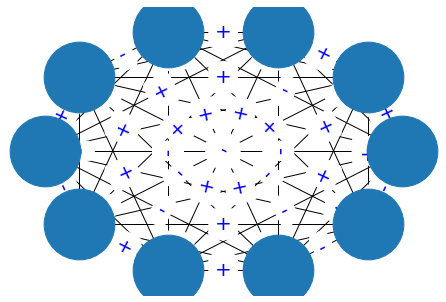

In [76]:
edge_labels=nx.get_edge_attributes(G,'sign')
pos=nx.circular_layout(G)
nx.draw(G,pos,node_size=5000)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels,font_size=20,font_color='blue')
plt.show()

In [77]:
def Get_signs_of_tris(t_list,G):
  a_sign=[]
  for i in range(len(t_list)):
    temp=[]
    temp.append(G[t_list[i][0]][t_list[i][1]]['sign'])
    temp.append(G[t_list[i][1]][t_list[i][2]]['sign'])
    temp.append(G[t_list[i][2]][t_list[i][0]]['sign'])
    a_sign.append(temp)
  unstable= count_unstable(a_sign) 

In [78]:
def count_unstable(a_sign):
  stable=0
  unstable=0
  for i in range(len(a_sign)):
    if a_sign[i].count('+')==3 or a_sign[i].count('+')==1:
      stable+=1
    elif a_sign[i].count('+')==2 or a_sign[i].count('+')==0:
      unstable+=1
  print('Number of balanced cycle',stable)    
  print('Number of unbalanced cycle',unstable)    

In [79]:
nodes=G.nodes()
t_list=[list(x) for x in itertools.combinations(nodes,3)]
a_sign=[]
a_sign = Get_signs_of_tris(t_list,G)


Number of balanced cycle 64
Number of unbalanced cycle 56
